<a href="https://colab.research.google.com/github/Gu7dashuai/Interpolation_wavelet/blob/main/global_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import functools

In [4]:
#Defining constants
H0=(1+math.sqrt(3))/4
H1=(3+math.sqrt(3))/4
H2=(3-math.sqrt(3))/4
H3=(1-math.sqrt(3))/4
R0=(3-math.sqrt(3))/2

In [5]:
#Recurrence function, basic building block of Daubechies-2 wavelets
@functools.lru_cache()
def phi(x):
  #Input: independent variable x, dtype=float
  #Output: objective value of function y=phi(x)
  if x<0 or x>3:
    return 0
  if x==0:
      return 0
  if x==1:
      return (1+math.sqrt(3))/2
  if x==2:
      return (1-math.sqrt(3))/2
  if x==3:
      return 0
  return H0*phi(2*x)+H1*phi(2*x-1)+H2*phi(2*x-2)+H3*phi(2*x-3)

In [6]:
#Function that multiplies all numbers in a vector by a multiple of 10 to make sure all numbers are integers in the vector
def zoom(vector):
  #Input: A vector of numbers
  #Output: A vector of integers
  List_values=[]
  List_string=[]
  List_stringlength=[]
  if all([isinstance(numbers,int)==True for numbers in vector]): #Test if all values in the input are integers or not
    Zoom_coefficient=1 #If the vector is all integers, the coefficient is 1 so nothing changes in the vector
  else: #If there's a decimal
    for numbers in vector:
      List_string.append(str(numbers))
    for strings in List_string:
      string_length=len(strings)
      List_stringlength.append(string_length)
    Longest_string=max(List_stringlength)  #Pick the number with longest decimal places.
    Zoom_coefficient=10**(Longest_string-2) #Make sure the number with longest decimal places turns into integers so all numbers can be turned into integers
  for i in range(len(vector)):
    Values=vector[i]*Zoom_coefficient
    List_values.append(Values)
  return List_values,Zoom_coefficient

In [7]:
def supplement(List_dilation_coefficients,ordinate):
  #Inputs:
  #List_dilation_coefficients: list of coefficients according to the ordinates of sample points
  #ordinate: array of ordinates of sample points
  #Outputs:
  #A longer list of coefficients that is supplemented to match the number of wavelets required
  List_index_of_ordinate=[]
  for k in range(0,len(ordinate)):
    Index_of_ordinate = List_dilation_coefficients.index(ordinate[k])
    List_index_of_ordinate.append(Index_of_ordinate)
  for i in range(len(List_index_of_ordinate)-1):
    Difference = List_index_of_ordinate[i+1] - List_index_of_ordinate[i]
    Slope = (ordinate[i+1]-ordinate[i])/(Difference) #Find the slope between two sample points
    for j in range(1,len(List_dilation_coefficients[List_index_of_ordinate[i]+1:List_index_of_ordinate[i+1]])+1): #Determine the coefficient according to the slope
      List_dilation_coefficients[List_index_of_ordinate[i]+j] = List_dilation_coefficients[List_index_of_ordinate[i]] + j*Slope
  return List_dilation_coefficients

In [8]:
#Approximating function using wavelets
def approximation(abscissa,ordinate,x):
  #Inputs:
  #vectors of ordinates and abscissae of samples
  #independent variable x of this one variable function
  #Output:
  #An outcome of the value of the function
  Outcome=0
  List_abscissa,Zoom_coefficient=zoom(abscissa)#Function zoom, ensure all inputs are integers
  Numbers_of_wavelets=int(List_abscissa[-1])+1
  Dilation_coefficients=np.zeros(Numbers_of_wavelets)
  for i in range(int(len(abscissa))):
    Dilation_coefficients[int(List_abscissa[i])]=ordinate[i]#The existing coefficients according to sample points
  List_dilation_coefficients=Dilation_coefficients.tolist()
  New_dilation_coefficients=supplement(List_dilation_coefficients,ordinate)#Assign values to other coefficients
  for k in range(Numbers_of_wavelets):
    Outcome += New_dilation_coefficients[k]*phi(x-k)# The approximating function
  return Outcome

In [11]:
#Interpolating function
def interpolation(abscissa,ordinate,x):
  #Inputs：
  #ordinate：Array of ordinates of sample points
  #abscissa：Array of abscissae of sample points
  #x :independent variable, abscissa of the point user want to interpolate dtype: float
  #Output:
  #objective function value, ordinate of the point user want to interpolate
  List_abscissa,Zoom_coefficient=zoom(abscissa)
  return approximation(abscissa,ordinate,(R0+x*Zoom_coefficient))

In [18]:
r=[0,1,2,3]
s=[0,5,10,15]
interpolation(r,s,1.5)

7.499999999999985

In [16]:
#Gives a plot of interpolating function given the sample points
def plotinterpolation(abscissa,ordinate):
  #Inputs:
  #abscissa: an array of values of abscissae of sample points
  #ordinate: an array of values of ordinates of sample points 
  List_y=[]
  List_x=np.arange(abscissa[0],abscissa[-1]+0.05,0.05)
  for x in List_x:
      y=interpolation(abscissa,ordinate,x)
      List_y.append(y)
  plt.plot(List_x,List_y, color='black',label='interpolation function f(x)')
  plt.title('x='+str(abscissa))
  plt.scatter(abscissa,s,s=50,color='red')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

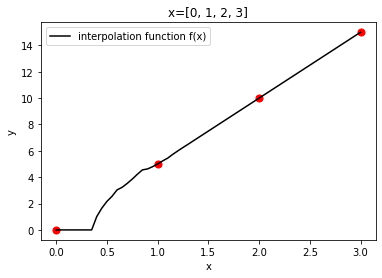

In [19]:
plotinterpolation(r,s)